In [2]:
import random
#import time
import pybullet as p
import numpy as np
import sim_class
from PIL import Image
import concurrent.futures
import tool
from sys import argv
from matplotlib import pyplot as plt

loop_id = 999
img_save_dir = './data'+str(loop_id)+'/train/input/'
label_save_dir = './data'+str(loop_id)+'/train/label/'
state_save_dir = './data'+str(loop_id)+'/train/state/'
seg_map_dir = './data'+str(loop_id)+'/train/seg_save/'
sec_input_dir = './data'+str(loop_id)+'/train/sec_input/'

tool.create_dir_not_exist(img_save_dir)
tool.create_dir_not_exist(label_save_dir)
tool.create_dir_not_exist(state_save_dir)
tool.create_dir_not_exist(seg_map_dir)
tool.create_dir_not_exist(sec_input_dir)

image_pixel_before = 640
image_pixel_after = 480

floder_id = 0

object_ran = 0#random.randint(0,2)
num_obj = 13#130+random.randint(-10,10)
#    object_ran = 0
if object_ran == 0:
    object_path = './objurdf/duomi/duomi.urdf'
elif object_ran == 1:
    object_path = './objurdf/gosize/gosize.urdf'
#        num_obj = 130+random.randint(-10,10)
elif object_ran == 2:
    object_path = './objurdf/sanjiao/sanjiao.urdf'

GUI = True
EyePosition=[0,0,0.51+random.uniform(-0.04,0.04)]
TargetPosition=[0,0,0]
fov_d = 69
near = 0.001
far = EyePosition[2]+0.05
state_save_path = state_save_dir+str(floder_id)+'.bullet'
robotStartOrn = p.getQuaternionFromEuler([0, 0, 0])

sim = sim_class.Sim(state_save_path, num_obj, GUI, image_pixel_before, EyePosition,TargetPosition,fov_d,far,near,robotStartOrn,object_path)
#build env_sim
sim.build_e()

#渲染图像
rgbImg, depthImg, segImg = sim.render()
img_d, float_depth, poke_pos_map = sim.after_render()

In [29]:
mask_ind = np.where(segImg==3)
print(mask_ind)

(array([261, 261, 261, ..., 321, 321, 322]), array([166, 167, 168, ..., 131, 132, 131]))


In [ ]:
from matplotlib import pyplot as plt

#plt.imshow(mask)

obj_num = 13
for i in range(2,obj_num):
    mask_ind = np.where(segImg==i)
    mask = np.zeros((480,480))
    mask[mask_ind] = 1
    mask_sum = np.sum(mask)
    if mask_sum > 1600:
        plt.imshow(mask)
        plt.show()
        print('ploted!')

In [42]:
depthImg.shape

(480, 480)

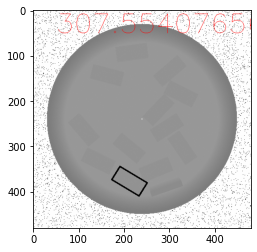

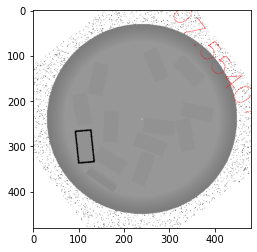

In [16]:
import numpy as np
import math
import sim_class
from PIL import Image
from matplotlib import pyplot as plt

img = Image.open('./data999/train/depth_0_2.png')
plt.imshow(img)
plt.show()
img0 = img.rotate(angle=307, fillcolor=(255,255,255))
plt.imshow(img0)
plt.show()

In [25]:
round(30/60)

0

In [105]:
import glob

name = glob.glob('./data999/train/label/*.png')
#print(name)

count = 0
for nl in range(len(name)):
    if 'yaw_0' in name[nl] and 'pitch_20' in name[nl] and 'roll_-10' in name[nl]:
        count = count + 1
print(count)

8


In [ ]:
import glob
import numpy as np

z = np.zeros(5).reshape(1,1,5)

name = glob.glob('./data999/train/sec_input/*.npy')
print(name[5])
for nl in range(len(name)):
    aa = np.load(name[nl])
    print(aa[0][0][1])

In [28]:
import glob
import os.path
from PIL import Image
import numpy as np
from tqdm import tqdm

loop_id = 0
label_namelist = glob.glob('./pre_data'+str(loop_id)+'/train/label/*.png')
input_namelist = []
for path in label_namelist:
    input_namelist.append((path[:-4] + '.png').replace('label', 'input'))
sec_namelist = []
for path in label_namelist:
    sec_namelist.append((path[:-4] + '.npy').replace('label', 'sec_input'))
    
for i in tqdm(range(len(label_namelist))):
    label = np.array(Image.open(label_namelist[i]))
    if np.min(label) == 255:
        os.remove(label_namelist[i])
        os.remove(input_namelist[i])
        os.remove(sec_namelist[i])

100%|██████████| 19440/19440 [00:06<00:00, 2901.92it/s]


In [1]:
import glob

label_namelist = glob.glob('./pre_data'+str(loop_id)+'/train/label/*.png')
input_namelist = glob.glob('./pre_data'+str(loop_id)+'/train/input/*.png')
sec_namelist = glob.glob('./pre_data'+str(loop_id)+'/train/sec_input/*.npy')

print(len(label_namelist))
count = 0
for i in range(len(label_namelist)):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-1-dce00b06edd2>, line 8)

In [2]:
import glob
loop_id = 0
label_namelist = glob.glob('./pre_data'+str(loop_id)+'/train/label/gostone*.png')
input_namelist = glob.glob('./pre_data'+str(loop_id)+'/train/input/gostone*.png')
sec_namelist = glob.glob('./pre_data'+str(loop_id)+'/train/sec_input/gostone*.npy')



644868
./pre_data0/train/label/gostone_num_645_yaw_60_ap_3_pitch_20_roll_10_fl_2_long.png


644868
./pre_data0/train/label/gostone_num_645_yaw_60_ap_3_pitch_20_roll_10_fl_2_long.png


In [18]:
from tqdm import tqdm
import glob
import os
loop_id = 0
label_namelist = glob.glob('./pre_data'+str(loop_id)+'/train/label/gostone*.png')
input_namelist = glob.glob('./pre_data'+str(loop_id)+'/train/input/gostone*.png')
sec_namelist = glob.glob('./pre_data'+str(loop_id)+'/train/sec_input/gostone*.npy')
for i in tqdm(range(len(sec_namelist))):
    if 'long' in sec_namelist[i] == False:
        oldname = sec_namelist[i]
        newname = sec_namelist[i][:-4]+ '_long.npy'
        os.rename(oldname,newname)


100%|██████████| 622327/622327 [00:00<00:00, 3649990.46it/s]


In [27]:
import numpy as np

for i in tqdm(range(len(sec_namelist))):
    oldname = sec_namelist[i]
    if 'gostone_num_861_yaw_300_ap_2_pitch_0_roll_-10_fl_' in sec_namelist[i]:
        print(sec_namelist[i])
    #newname = sec_namelist[i][:-4]+ '_long.npy'
    #os.rename(oldname,newname)
sec_input_dir = './pre_data'+str(loop_id)+'/train/sec_input/'
floder_id = 861
i=5
ap_ind=2
pt=0
rt=-10
fl_ind=2
grasp_paras = np.zeros(5).reshape(1,1,5)
grasp_paras[0][0][0]=ap_ind
grasp_paras[0][0][1]=i * 60
grasp_paras[0][0][2]=pt
grasp_paras[0][0][3]=rt
grasp_paras[0][0][4]=fl_ind
grasp_paras_save_path = sec_input_dir+'gostone_'+'num_'+str(floder_id)+'_yaw_'+str(int(i*60)) \
                            +'_ap_'+str(int(ap_ind))+'_pitch_'+str(int(pt)) \
                            +'_roll_'+str(int(rt))+'_fl_'+str(int(fl_ind))+'_long.npy'
print(grasp_paras_save_path)
np.save(grasp_paras_save_path, grasp_paras.astype(np.int))


100%|██████████| 622327/622327 [00:00<00:00, 2842819.60it/s]

./pre_data0/train/sec_input/gostone_num_861_yaw_300_ap_2_pitch_0_roll_-10_fl_1_long.npy
./pre_data0/train/sec_input/gostone_num_861_yaw_300_ap_2_pitch_0_roll_-10_fl_3_long.npy
./pre_data0/train/sec_input/gostone_num_861_yaw_300_ap_2_pitch_0_roll_-10_fl_2_long.npy


In [22]:
print(len(label_namelist))
count = 0
for i in range(len(label_namelist)):
    fname = 'gostone_num_861_yaw_300_ap_2_pitch_0_roll_-10_fl_2_long.png'
    if fname in label_namelist[i]:
        print(label_namelist[i])

644868
./pre_data0/train/label/gostone_num_861_yaw_300_ap_2_pitch_0_roll_-10_fl_2_long.png
